# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [21]:
import pandas as pd
import numpy as np
import io
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [22]:
import tensorflow as tf
df = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 5000',
       'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda accord cvcc', 'honda accord lx',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf',
       'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe',
       'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom 

In [25]:
#checking for empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(df.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [26]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [27]:
# correcting the name error in audi 100 ls
df.iloc[3,2] = 'audi 100ls'

In [28]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [29]:
df.drop(columns=['car_ID'], inplace = True)

In [30]:
# get columns so that we can use the column names for onehot encoding of catagorical featrues in next cell
df.columns[df.dtypes=='object']

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [31]:
# onehot encode all catagorical columns
final = pd.get_dummies(df, columns=['CarName','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)


In [32]:
final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
#checking statistical data to see abnormal values and outliers
final.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.004878,0.004878,0.009756,0.009756,0.009756,0.004878,0.004878,0.009756,0.004878,0.004878,0.004878,0.902439,0.180488,0.439024,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.014634,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.069843,0.069843,0.098531,0.098531,0.098531,0.069843,0.069843,0.098531,0.069843,0.069843,0.069843,0.297446,0.385535,0.497483,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.120377,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.00

In [34]:
#initialize a seed value so that each time we can get the same random number sequence
# 0.72 means we have taken 72% values for training set as we will make 72/4 = 18 rows of k fold validation data
# value of k will be 4 when we compile and fit our model for validation
np.random.seed(11111)
msk = np.random.rand(len(final)) < 0.72
train_total = final[msk]
test_total = final[~msk]

In [35]:
#check the length of our test and train datasets
print(len(train_total))
print(len(test_total))

141
64


In [36]:
train_total.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11,0,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16925.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# check statistical overview if there are some outliers and abnormal values
train_total.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.0,141.000000,141.000000,141.0,141.0,141.0,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.893617,98.692199,173.658156,65.875887,53.648227,2546.787234,125.666667,3.324184,3.256809,10.070355,103.702128,5143.971631,25.113475,30.581560,13379.132390,0.007092,0.0,0.007092,0.021277,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.014184,0.0,0.007092,0.0,0.007092,0.007092,0.0,0.0,0.0,0.007092,0.007092,0.007092,0.0,0.007092,0.007092,...,0.007092,0.007092,0.014184,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.907801,0.198582,0.446809,0.042553,0.347518,0.446809,0.12766,0.581560,0.361702,0.014184,0.0,0.049645,0.723404,0.078014,0.056738,0.028369,0.063830,0.765957,0.120567,0.0,0.007092,0.028369,0.326241,0.021277,0.092199,0.007092,0.453901,0.035461,0.007092
std,1.228833,6.005665,12.320089,2.188604,2.508204,529.769152,41.733451,0.266123,0.296387,3.868579,38.424275,474.472458,6.509435,6.734937,8189.494568,0.084215,0.0,0.084215,0.144819,0.084215,0.084215,0.084215,0.084215,0.084215,0.084215,0.118672,0.0,0.084215,0.0,0.084215,0.084215,0.0,0.0,0.0,0.084215,0.084215,0.084215,0.0,0.084215,0.084215,...,0.084215,0.084215,0.118672,0.084215,0.084215,0.084215,0.084215,0.084215,0.084215,0.084215,0.084215,0.290337,0.400354,0.498935,0.202567,0.477879,0.498935,0.33490,0.495062,0.482206,0.118672,0.0,0.217986,0.448910,0.269150,0.232165,0.166616,0.245321,0.424908,0.326785,0.0,0.084215,0.166616,0.470508,0.144819,0.290337,0.084215,0.499645,0.185601,0.084215
min,-1.000000,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,55.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,

In [38]:
print(train_total.dtypes)

symboling            int64
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 189, dtype: object


In [39]:
# storing price in another dataframe
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [40]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 141, dtype: float64

In [41]:
# droping price from original dataset
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [42]:
train_data.shape

(141, 188)

In [43]:
train_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,...,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [54]:
#get indices of the columns so that we can know how many columns we have to normalize, as catagorical columns which we
# have added with onehot encoding, do not need to be normalized.. normalizing will be done in next cell
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'symboling',
 1: 'wheelbase',
 2: 'carlength',
 3: 'carwidth',
 4: 'carheight',
 5: 'curbweight',
 6: 'enginesize',
 7: 'boreratio',
 8: 'stroke',
 9: 'compressionratio',
 10: 'horsepower',
 11: 'peakrpm',
 12: 'citympg',
 13: 'highwaympg',
 14: 'CarName_alfa-romero Quadrifoglio',
 15: 'CarName_alfa-romero giulia',
 16: 'CarName_alfa-romero stelvio',
 17: 'CarName_audi 100ls',
 18: 'CarName_audi 4000',
 19: 'CarName_audi 5000',
 20: 'CarName_audi 5000s (diesel)',
 21: 'CarName_audi fox',
 22: 'CarName_bmw 320i',
 23: 'CarName_bmw x1',
 24: 'CarName_bmw x3',
 25: 'CarName_bmw x4',
 26: 'CarName_bmw x5',
 27: 'CarName_bmw z4',
 28: 'CarName_buick century',
 29: 'CarName_buick century luxus (sw)',
 30: 'CarName_buick century special',
 31: 'CarName_buick electra 225 custom',
 32: 'CarName_buick opel isuzu deluxe',
 33: 'CarName_buick regal sport coupe (turbo)',
 34: 'CarName_buick skyhawk',
 35: 'CarName_buick skylark',
 36: 'CarName_chevrolet impala',
 37: 'CarName_chevrolet monte ca

In [55]:
# normalization is carried out because that data has large vlaues in decimal and it will effect the performance of our model
# may overfit or we may face hardware resource high usage
# we will apply the formula normalized_train_data = (train_data - mean)/ stadrad_deviation
# firt find mean and std of training data, then subtract mean from each value of the array slice train_data.iloc[:,0:13]
mean = train_data.iloc[:,0:14].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:14] -= mean
std = train_data.iloc[:,0:14].std(axis=0)
train_data.iloc[:,0:14] /= std
test_data.iloc[:,0:14] -= mean
test_data.iloc[:,0:14] /= std



In [56]:
mean

symboling           1.259828e-17
wheelbase           2.834612e-17
carlength           0.000000e+00
carwidth            7.873922e-17
carheight          -1.574784e-18
curbweight          6.299138e-18
enginesize          1.732263e-17
boreratio          -1.417306e-17
stroke             -1.240143e-16
compressionratio   -1.791317e-17
horsepower         -3.543265e-18
peakrpm            -3.622004e-17
citympg             1.259828e-17
highwaympg         -5.984181e-17
dtype: float64

In [57]:
std

symboling           1.0
wheelbase           1.0
carlength           1.0
carwidth            1.0
carheight           1.0
curbweight          1.0
enginesize          1.0
boreratio           1.0
stroke              1.0
compressionratio    1.0
horsepower          1.0
peakrpm             1.0
citympg             1.0
highwaympg          1.0
dtype: float64

In [58]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [59]:
mean_label

13379.132390070921

In [60]:
std_label

8189.4945680106175

In [61]:
print(mean_label)

13379.132390070921


In [62]:
test_label

0      0.014148
10     0.372534
14     1.365880
15     2.122337
18    -1.004718
         ...   
192    0.056886
193   -0.132991
194   -0.053621
196    0.318196
198    0.615529
Name: price, Length: 64, dtype: float64

In [63]:
train_data.shape

(141, 188)

In [64]:
#store in numpy array
test = np.array(test_data.iloc[:]).astype('float32')
train = np.array(train_data.iloc[:]).astype('float32')
test_l= np.array(test_label.astype('float32'))
train_l= np.array(train_label.astype('float32'))

In [65]:
train.shape[1]


188

In [66]:
(141,192)[1]

192

In [67]:
train.dtype

dtype('float32')

In [72]:
#Models section
# WE will configure different models here according to relu, tanh , regularization, dropout etc..
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model
from keras import models
from keras import layers
model_relu = models.Sequential()
model_relu.add(layers.Dense(128, activation= 'relu',input_shape=(train.shape[1],)))
model_relu.add(layers.Dense(64, activation= 'relu'))
model_relu.add(layers.Dense(32, activation= 'relu'))
model_relu.add(layers.Dense(1))
model_relu.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [73]:
model_relu.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               24192     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(128, activation= 'tanh',input_shape=(train.shape[1],)))
model_tanh.add(layers.Dense(64, activation= 'tanh'))
model_tanh.add(layers.Dense(32, activation= 'tanh'))
model_tanh.add(layers.Dense(1))
model_tanh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [83]:
model_tanh.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               24192     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Regularized model
from keras import regularizers
model_reg_tanh = models.Sequential()
model_reg_tanh.add(layers.Dense(10, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
model_reg_tanh.add(layers.Dense(8, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
model_reg_tanh.add(layers.Dense(6, activation= 'tanh',kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
model_reg_tanh.add(layers.Dense(1))
model_reg_tanh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [90]:
model_reg_tanh.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                1890      
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 2,039
Trainable params: 2,039
Non-trainable params: 0
_________________________________________________________________


In [86]:
# dropout model
from keras import regularizers
model_drop_relu = models.Sequential()
model_drop_relu.add(layers.Dense(10, activation= 'relu',input_shape=(train.shape[1],)))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(8, activation= 'relu'))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(6, activation= 'relu'))
model_drop_relu.add(layers.Dropout(0.2))
model_drop_relu.add(layers.Dense(1))
model_drop_relu.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [87]:
model_drop_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                1890      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [88]:
# K Fold validation section
# here we will use len(train)//k to make 141//4 = 36 rows for validation in each validation test and collect the validation scores for relu , tanh , regularization , and dropout
# k fold validation with relu
# 141/4
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_relu
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [89]:
# 141/4
#k fold validation with tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_tanh
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [91]:
#k-fold validtion with regularization
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_reg_tanh
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [92]:
#k-fold validtion with dropout
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = model_drop_relu
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
106/106 [==============================] - 1s 1ms/step - loss: 1.1146 - mae: 0.7585
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7629 - mae: 0.5670
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.8673 - mae: 0.6267
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7385 - mae: 0.5593
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7573 - mae: 0.5925
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3947 - mae: 0.4285
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6383 - mae: 0.5369
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.8221 - mae: 0.5913
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4099 - mae: 0.3976
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.9244 - mae: 0.5523
Epoch 11/100
106/10

In [93]:
#Scores
#here we will see MAE (mean absolute Error) scores of all model which we have saved in the list during each training in above section

all_scores_relu

[0.08154716342687607,
 0.06279575824737549,
 0.04168539494276047,
 0.05582733824849129]

In [94]:
all_scores_tanh

[0.301465779542923,
 0.1716851145029068,
 0.0966978371143341,
 0.04208482429385185]

In [95]:
all_scores_regular

[0.28093230724334717,
 0.2538939416408539,
 0.21693578362464905,
 0.30400699377059937]

In [96]:
all_scores_drop

[0.4001878499984741,
 0.3218493163585663,
 0.26086896657943726,
 0.2312847077846527]

In [97]:
# training on the training data
# here we will call each model separately from Models section and train on the training data and evaluate on the test data

model_tanhh = model_tanh
model_tanhh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanhh.evaluate(test, test_l)

2/2 [==============================] - 0s 8ms/step - loss: 0.1438 - mae: 0.2801


In [98]:
model_reluu = model_relu
model_reluu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_reluu.evaluate(test, test_l)

2/2 [==============================] - 0s 7ms/step - loss: 0.0900 - mae: 0.2344


In [99]:
model_regular = model_reg_tanh
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

2/2 [==============================] - 0s 7ms/step - loss: 0.1228 - mae: 0.2360


In [100]:
model_drop = model_drop_relu
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)

2/2 [==============================] - 0s 9ms/step - loss: 0.1507 - mae: 0.2979


In [101]:
#Prediction Section
#here we will predict our prices of our test dataset with each model which we have trained in training section
#Note that here we will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate( y = x * std + mean) and then we will compare it with our target values

test_l

array([ 0.01414832,  0.3725343 ,  1.3658801 ,  2.122337  , -1.004718  ,
       -0.7045773 , -0.5886972 , -0.97443527, -0.763189  , -0.52312535,
       -0.05301089, -0.3704908 , -0.5449216 , -0.80397296, -0.5536523 ,
       -0.26059392,  0.6062484 ,  1.4864004 ,  2.5404336 ,  3.367835  ,
       -0.8779702 , -0.09159691,  0.18192424, -0.7802841 , -0.50065756,
       -0.9622245 , -0.6813769 , -0.5409531 ,  0.01463675,  0.12453365,
        0.46643507, -0.1806134 ,  0.2687428 ,  0.4299249 ,  0.45129374,
       -0.07511237,  2.3382235 ,  2.200547  , -0.49870384,  0.20280465,
        0.26019526, -0.68430746, -0.7224051 , -0.65524584, -0.98066276,
       -0.7889537 , -0.7547636 , -0.6888255 , -0.6277716 , -0.4983375 ,
       -0.6020069 , -0.4139611 , -0.22347318, -0.54107517,  0.28217462,
       -0.68430746, -0.6574438 , -0.59638995, -0.01027321,  0.056886  ,
       -0.1329914 , -0.05362143,  0.3181964 ,  0.6155285 ], dtype=float32)

In [103]:
def predict(model, m):
  print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [104]:
x_tanh = predict(model_tanhh,2)
x_tanh

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[21153.615]] '

In [105]:
x_relu = predict(model_reluu,2)
x_relu

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[20273.89]] '

In [106]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[26377.178]] '

In [107]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 24565.000309357743 


' the predicted Price was : [[21118.662]] '

In [108]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

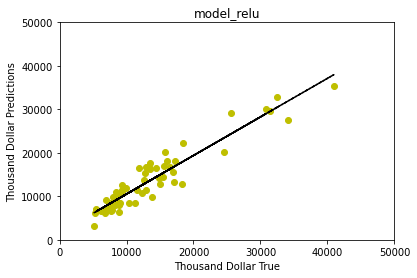

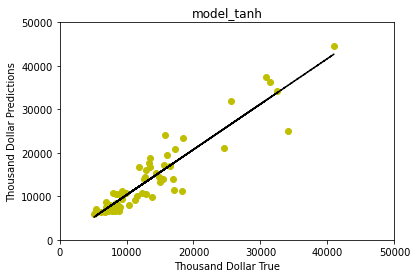

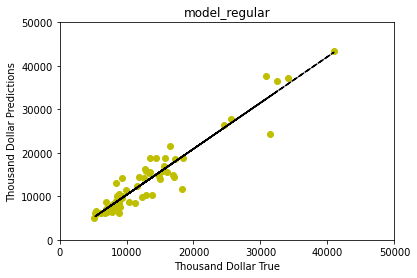

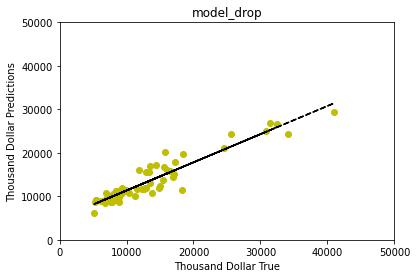

In [111]:
plot_list = []
for i,j in enumerate([model_reluu, model_tanhh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))